# This code generates 
## Fig7. Extracellular potential calculated from the soma-axon model with the AIS at three different distances

In [1]:
# import necessary libraries
import numpy as np
import os.path
import sys
import matplotlib.pylab as plt

from eap import graph

ext = '.pdf'
%matplotlib inline

In [2]:
# simulate the cell (or use the data from previous simulation)
simulate_new = False # set False if you want to use previously saved simulated previously data

In [3]:
%cd ../../data/HallermannEtAl2012

/home/maria/maja/articles/lfp_phd/final code/data/HallermannEtAl2012


In [4]:
from calcs import simulate as sim

In [5]:
# get neuron params
data_phys = sim.get_data('', simulate_new=simulate_new, run_original=True)
# exact parameters of the simulation are set in the simulate.py file

In [6]:
data_red = sim.get_data('', simulate_new=simulate_new, run_original=False)

In [7]:
# calculate local field potential
calc_lfp_new = False
field_size_type = 'ais_zoom' # 'ais_det' for zoomed in figs
                    # 'lfp_zoom_out', for full morpho; both simulations are long

In [8]:
from calcs import calc_lfp 

In [9]:
# parameters for the field calculations
lfp_data_phys = calc_lfp.get_lfp_data(data_phys, calc_lfp_new=calc_lfp_new, field_size_type=field_size_type, 
                                run_original=True)

In [10]:
lfp_data_red = calc_lfp.get_lfp_data(data_red, calc_lfp_new=calc_lfp_new, field_size_type=field_size_type, 
                                run_original=False)

In [11]:
field_size_type = 'lfp_zoom_out'
lfp_data_phys = calc_lfp.get_lfp_data(data_phys, calc_lfp_new=calc_lfp_new, field_size_type=field_size_type, 
                                run_original=True)
lfp_data_red = calc_lfp.get_lfp_data(data_red, calc_lfp_new=calc_lfp_new, field_size_type=field_size_type, 
                                run_original=False)

In [12]:
# to do
# find the limits for xlims
def find_spike(volt, dt):
    spike_peak = np.argmax(volt)*dt
    return spike_peak

In [13]:
def clean_frame(ax):
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)  

In [14]:
import matplotlib.cm as cm
# plot the imshow of the given field (2d array)
def imshow_data(ax, data, seg_coords, x_range, y_range, vmin=0, vmax=100, cmap=cm.YlOrRd,
               scalebar=100, xp_scbar=20, yp_scbar=-50, log=False, 
                autolim = True):    

    plt.sca(ax)
    if log:
        pl = plt.imshow(data, interpolation="nearest", 
           extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
           origin='lower', vmin=vmin, vmax=vmax, cmap=cmap,
            norm=colors.SymLogNorm(linthresh=0.01 * np.max(data),
                                                linscale=1.0,
                                                vmin=vmin, vmax=vmax))
    else:
        pl = plt.imshow(data, interpolation="nearest", 
           extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
           origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)     
    
    if scalebar != None:
        plot_scalebar(ax, scalebar=scalebar,xp=xp_scbar,yp=yp_scbar)
    graph.plot_neuron(seg_coords, colors='0.4', autolim = autolim)
    ax.axis('off')
    ax.set_ylim(y_range)
    ax.set_xlim(x_range)
    plt.tight_layout()

In [15]:
def plot_scalebar(ax, scalebar = 100, xp = 100, yp = -100):
# scalebar
    w, h = scalebar, scalebar
    plt.plot([xp, xp], [yp, yp+h], 'k-')
    plt.plot([xp, xp+h], [yp, yp], 'k-')
    plt.text(xp, yp+h/2., str(scalebar) +u" µm", ha='right', va='center',
             transform=ax.transData)
    plt.text(xp+h/2., yp, str(scalebar) + u" µm", ha='center', va='top',
             transform=ax.transData)

In [16]:
def plot_fig_7A(data, lfp_data, title=''):
    axon_color = 'teal'
    soma_color = 'darkorange'
    ais_coord = [-8.10, -69.90]

    idx = 1
    v_ext = lfp_data['v_ext']
    xx = lfp_data['xx']
    yy = lfp_data['yy']
    x_range = lfp_data['x_range']
    y_range = lfp_data['y_range']
    
    seg_coords = data['seg_coords']
    
    x_range_plt = [-200, 200]
    y_range_plt = [-200, 200]
    vmin, vmax = -150,150

    plt.figure(figsize=(8, 10))
    pt1 = -0.15
    pt3 = 0.4
    streamplt_density = 0.4
    scalebar = 10

    #if len(postfixes) <= 2:
    gs = gridspec.GridSpec(4, 3, width_ratios=(3, 3 ,0.3))
    dt = data['dt']
    v_soma = data['v_soma']
    v_ais = data['vecs_ais'][-1]
    time = np.arange(len(data['v_soma']))*dt
    
    ### draw spikes
    ax = plt.subplot(gs[0,idx])
    plt.plot(time, v_soma, color=soma_color, label = 'soma')
    plt.plot(time, v_ais, color=axon_color, label = 'ais')
    if idx == 1:
        plt.legend(frameon = False)

    spike_peak = find_spike(v_ais, dt)
    plt.vlines(spike_peak, -100, 40, linestyles='--')
    line2 = int(spike_peak/dt)
    plt.vlines(spike_peak+pt1, -100, 40, linestyles='--')
    line1 = int((spike_peak+pt1)/dt)
    plt.vlines(spike_peak+pt3, -100, 40, linestyles='--')
    line3 = int((spike_peak+pt3)/dt)
    plt.title(title) #postfixes[idx])
        
    clean_frame(ax)
    plt.xlim([spike_peak-1.5, spike_peak+1.5])
    plt.ylim([-100,40])
        
    ### get extracellular data
    v_ext1 = v_ext[line1, :,:]/10e2 # change to microvolts
    v_ext2 = v_ext[line2, :,:]/10e2
    v_ext3 = v_ext[line3, :,:]/10e2

    ax1 = plt.subplot(gs[1,idx])
    im = imshow_data(ax1,v_ext1,seg_coords=seg_coords,
                    x_range=x_range,y_range=y_range,
                vmin=vmin,vmax=vmax,cmap=cm.bwr,scalebar=scalebar,
                         xp_scbar=40, yp_scbar=20,autolim = False)
    U = -np.diff(v_ext1, axis=0)[:, :-1]
    V = -np.diff(v_ext1, axis=1)[:-1, :]
        
    plt.axis('scaled')
    plt.plot(ais_coord[0], ais_coord[1], 'ob', ms = 8, mfc='none', mec = 'r')
    plt.streamplot(xx[0, :-1], yy[:-1, 0], V, U, density = streamplt_density, color = 'k', linewidth=0.5)
        
    ax2 = plt.subplot(gs[2,idx])
    im = imshow_data(ax2,v_ext2,seg_coords = seg_coords,x_range=x_range,y_range=y_range,
                vmin=vmin,vmax=vmax,cmap=cm.bwr,scalebar=scalebar,
                         xp_scbar=40, yp_scbar=20,autolim = False)
    U = -np.diff(v_ext2, axis=0)[:, :-1]
    V = -np.diff(v_ext2, axis=1)[:-1, :]
    plt.axis('scaled')
    plt.plot(ais_coord[0], ais_coord[1], 'ob', ms = 8, mfc='none', mec = 'r')
    plt.streamplot(xx[0, :-1], yy[:-1, 0], V, U, density = streamplt_density, color = 'k', linewidth=0.5)
        
    ax3 = plt.subplot(gs[3,idx])
    U = -np.diff(v_ext3, axis=0)[:, :-1]
    V = -np.diff(v_ext3, axis=1)[:-1, :]
    plt.streamplot(xx[0, :-1], yy[:-1, 0], V, U, density = streamplt_density, color = 'k', linewidth=0.5)
 
    im = imshow_data(ax3,v_ext3,seg_coords=seg_coords,x_range=x_range,y_range=y_range,
            vmin=vmin,vmax=vmax,cmap=cm.bwr,scalebar=scalebar,
                     xp_scbar=40, yp_scbar=20,autolim = False)   
        
    plt.axis('scaled')
    plt.plot(ais_coord[0], ais_coord[1], 'ob', ms = 8, mfc='none', mec = 'r')
    plt.plot(-3.18, -182, 'ob', ms = 8, mfc='none', mec = 'g') # 1st NoR

    ax_col = plt.subplot(gs[1,2])
    str_ticks = ['<'+str(vmin), '', '>'+str(vmax)]
    ticks = [vmin, 0, vmax]
    cbar = plt.colorbar(im, cax=ax_col, drawedges = False, ticks=ticks) 
    
    cbar.ax.set_ylabel(u'voltage (µV)')
    cbar.ax.set_yticklabels(str_ticks)
    plt.tight_layout()

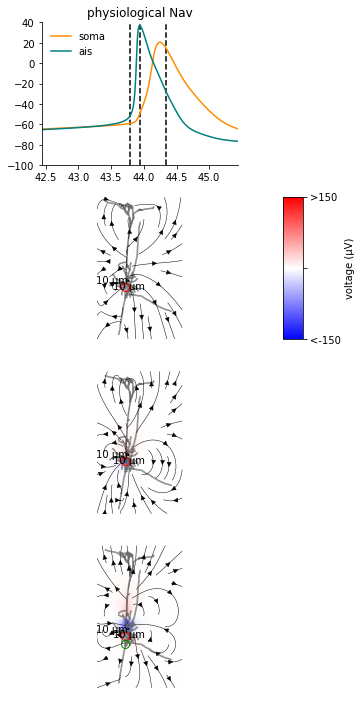

In [17]:
from matplotlib import gridspec
plot_fig_7A(data_phys, lfp_data_phys, title='physiological Nav')
ext = '.pdf'
plt.savefig('../../fig7phys_'+field_size_type+ext)

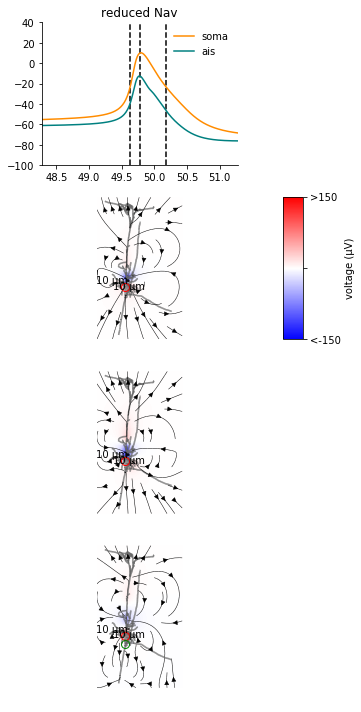

In [18]:
from matplotlib import gridspec
plot_fig_7A(data_red, lfp_data_red, title='reduced Nav')
ext = '.pdf'
plt.savefig('../../fig7red_'+field_size_type+ext)